# Unpaired two-sample t-test

## Libraries and settings

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Read example data (used car data)

In [2]:
df = pd.read_excel('t-tests_and_ANOVA.xlsx', sheet_name='t-test_data')

# Show categories of 'Make'
print(df['Make'].value_counts())

# Show first rows in dataframe
df.head()

VW     20
BMW    20
Name: Make, dtype: int64


,Make,Price
0,VW,29000
1,VW,38000
2,VW,33000
3,VW,64000
4,VW,52000


## Create grouped boxplot (groups = make, values = car prices)

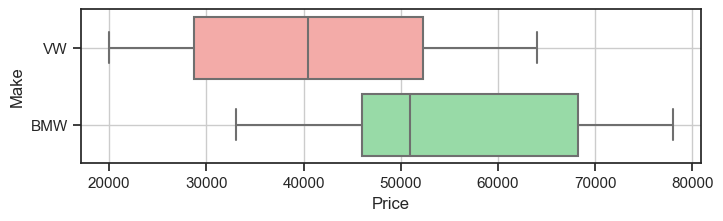

In [3]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Price",
                 y="Make",
                 palette=['r', 'g'],
                 data=df,
                 orient='h')
plt.grid()
plt.show()

## Unpaired two-sample t-test

In [4]:
# Create subsets (groups)
vw = df.loc[df['Make'] == 'VW']
bmw = df.loc[df['Make'] == 'BMW']

# Create t-test
result = stats.ttest_ind(vw['Price'], bmw['Price'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(5))

Test-statistic: -2.69607 p-value 0.0104


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the used car prices of VW, BMW differ. Note that, from the t-test above, it is not clear which brand show higher or lower prices. It only shows that there is a statistically significant (5% significance level) difference between prices.</p>

## Importing apartment data

In [5]:
# Read the data to a pandas data frame
df = pd.read_csv('apartments_data_enriched.csv', 
                 sep=',', 
                 encoding='utf-8')[['web-scraper-order',
                                    'bfs_name',
                                    'address_raw', 
                                    'datetime', 
                                    'rooms', 
                                    'area', 
                                    'luxurious',
                                    'price',
                                    'price_per_m2',
                                    'pop_dens']]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(870, 10)


,web-scraper-order,bfs_name,address_raw,datetime,rooms,area,luxurious,price,price_per_m2,pop_dens
0,1662023695-433,Bubikon,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",2022-09-17 11:44:57,3.5,122,1,3180,26.07,632.558140
1,1662023720-634,Bubikon,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",2022-09-17 11:44:57,4.0,87,0,1690,19.43,632.558140
2,1662023745-834,Bubikon,"8608 Bubikon, ZH",2022-09-17 11:44:57,3.5,92,0,2350,25.54,632.558140
3,1662023701-503,Bubikon,"8608 Bubikon, ZH",2022-09-17 11:44:57,3.5,130,0,2500,19.23,632.558140
4,1662023745-820,Zürich,"Lavaterstr. 63, 8002 Zürich, ZH",2022-09-17 11:44:57,2.5,78,0,3760,48.21,4778.994655


## Create new binary variable with densely populated and other municipalities

In [6]:
df['pop_dens_binary'] = (df['pop_dens'] <= 1000).astype(int)
df.head(5)

,web-scraper-order,bfs_name,address_raw,datetime,rooms,area,luxurious,price,price_per_m2,pop_dens,pop_dens_binary
0,1662023695-433,Bubikon,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",2022-09-17 11:44:57,3.5,122,1,3180,26.07,632.558140,1
1,1662023720-634,Bubikon,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",2022-09-17 11:44:57,4.0,87,0,1690,19.43,632.558140,1
2,1662023745-834,Bubikon,"8608 Bubikon, ZH",2022-09-17 11:44:57,3.5,92,0,2350,25.54,632.558140,1
3,1662023701-503,Bubikon,"8608 Bubikon, ZH",2022-09-17 11:44:57,3.5,130,0,2500,19.23,632.558140,1
4,1662023745-820,Zürich,"Lavaterstr. 63, 8002 Zürich, ZH",2022-09-17 11:44:57,2.5,78,0,3760,48.21,4778.994655,0


## Create pivot table with mean price_per_m2

In [7]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['pop_dens_binary', 'price_per_m2']],
               index=['pop_dens_binary'],
               values=['price_per_m2'],
               aggfunc=[np.mean, 'count'])

,mean,count
,price_per_m2,price_per_m2
pop_dens_binary,,
0,31.511726,591
1,24.395233,279


## Create grouped boxplot (groups = pop_dens_binary, values = prices_per_m2)

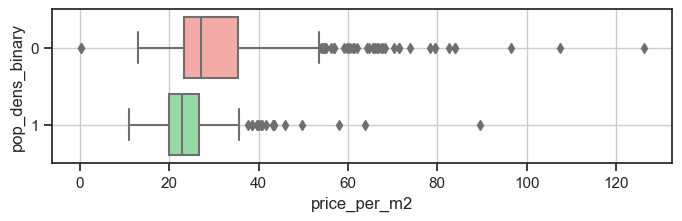

In [8]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="pop_dens_binary",
                 data=df,
                 palette=['r', 'g'],
                 orient='h')
plt.grid()
plt.show()

## Unpaired two-sample t-test

In [9]:
# Create subsets (groups)
densely_populated = df.loc[df['pop_dens_binary'] == 0]
not_densely_populated = df.loc[df['pop_dens_binary'] == 1]

# Create t-test
result = stats.ttest_ind(densely_populated['price_per_m2'], 
                         not_densely_populated['price_per_m2'])

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(6))

Test-statistic: 8.09498 p-value 0.0


## Compare rental apartment prices in the cities of Winterthur and Zuerich

In [10]:
df_winti = df.loc[df['bfs_name'] == 'Winterthur']['price_per_m2']
df_zueri = df.loc[df['bfs_name'] == 'Zürich']['price_per_m2']

## Unpaired two-sample t-test

In [11]:
# Create t-test
result = stats.ttest_ind(df_winti, df_zueri)

# Print result
print('Test-statistic:', result[0].round(5), 'p-value',  result[1].round(6))

Test-statistic: -9.27603 p-value 0.0


## Interpretation of result

<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices per m2 differ between densely populated and other municipalities. Note that, from the t-test above, it is not clear which group of municipalities show lower or higher prices. It only shows that there is a statistically significant (5% significance level) difference between prices.</p>

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [12]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 21.6.0
Datetime: 2022-10-27 13:18:37
Python Version: 3.9.13
-----------------------------------
